In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [53]:
df=pd.read_excel("Phone Metrics.xlsx")
print(df.isnull().sum())

lead_number                          0
first_name                         123
Lead Id                          67264
inbound_phone_call_counter       61627
mobile_number                   259514
outbound_phone_call_counter      37546
lead_stage                         209
lead_score                           0
owner                                0
activity                             0
date_of_call                         0
status                               0
call_duration_sec                    0
calls_done_by                        0
contacted                       260623
call_time                            0
calls_done_by2                       0
new_followup                    257243
sales_squad                      80908
squad_role                       80908
calls_done_by_without_spaces         0
dtype: int64


In [54]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('Phone Metrics.csv', encoding='utf-8')

print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260623 entries, 0 to 260622
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   lead_number                   260623 non-null  int64  
 1   first_name                    260500 non-null  object 
 2   Lead Id                       193359 non-null  object 
 3   inbound_phone_call_counter    198996 non-null  float64
 4   mobile_number                 1109 non-null    float64
 5   outbound_phone_call_counter   223077 non-null  float64
 6   lead_stage                    260414 non-null  object 
 7   lead_score                    260623 non-null  int64  
 8   owner                         260623 non-null  object 
 9   activity                      260623 non-null  object 
 10  date_of_call                  260623 non-null  object 
 11  status                        260623 non-null  object 
 12  call_duration_sec             260623 non-nul

In [55]:

df=df.drop(columns=["new_followup"])
# df["new_followup"]=df["new_followup"].fillna("Unknown",inplace=True)


In [59]:
df["sales_squad"]=df["sales_squad"].fillna("Unknown")
df["squad_role"]=df["squad_role"].fillna("Unknown")


In [68]:
df["inbound_phone_call_counter"]=df["inbound_phone_call_counter"].fillna(df["inbound_phone_call_counter"].median())
df["outbound_phone_call_counter"]=df["outbound_phone_call_counter"].fillna(df["outbound_phone_call_counter"].median())
# df=df.dropna(subset=["first_name"])
# df=df.drop(columns=["contacted","mobile_number"])
df["lead_stage"]=df["lead_stage"].fillna(df["lead_stage"].mode()[0])
# df['column_name'].fillna(df['column_name'].mode()[0], inplace=True)


In [69]:
null_percentages = (df.isnull().sum() / len(df)) * 100
print("\
Percentage of null values in each column:")
print(null_percentages)


Percentage of null values in each column:
lead_number                      0.000000
first_name                       0.000000
Lead Id                         25.796161
inbound_phone_call_counter       0.000000
outbound_phone_call_counter      0.000000
lead_stage                       0.000000
lead_score                       0.000000
owner                            0.000000
activity                         0.000000
date_of_call                     0.000000
status                           0.000000
call_duration_sec                0.000000
calls_done_by                    0.000000
call_time                        0.000000
calls_done_by2                   0.000000
sales_squad                      0.000000
squad_role                       0.000000
calls_done_by_without_spaces     0.000000
dtype: float64


In [70]:
import numpy as np
import pandas as pd
from scipy import stats


numeric_df = df.select_dtypes(include=[np.number])

z_scores = np.abs(stats.zscore(numeric_df))

outliers_z = (z_scores > 3).sum(axis=0)

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()

print("Count of outliers using Z-score:")
print(outliers_z)
print("\nCount of outliers using IQR:")
print(outliers_iqr)


Count of outliers using Z-score:
lead_number                       0
inbound_phone_call_counter     1870
outbound_phone_call_counter    4655
lead_score                     5138
call_duration_sec              5197
dtype: int64

Count of outliers using IQR:
lead_number                        0
inbound_phone_call_counter     36236
outbound_phone_call_counter    19417
lead_score                     32646
call_duration_sec              40521
dtype: int64


In [71]:
df.to_csv("Phone_Cleaned.csv",index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260623 entries, 0 to 260622
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   lead_number                   260623 non-null  int64  
 1   first_name                    260500 non-null  object 
 2   Lead Id                       193359 non-null  object 
 3   inbound_phone_call_counter    198996 non-null  float64
 4   mobile_number                 1109 non-null    float64
 5   outbound_phone_call_counter   223077 non-null  float64
 6   lead_stage                    260414 non-null  object 
 7   lead_score                    260623 non-null  int64  
 8   owner                         260623 non-null  object 
 9   activity                      260623 non-null  object 
 10  date_of_call                  260623 non-null  object 
 11  status                        260623 non-null  object 
 12  call_duration_sec             260623 non-nul

In [72]:
import pandas as pd

df2=df

df2['date_of_call'] = pd.to_datetime(df2['date_of_call'])

print(df2['date_of_call'].head())


0   2024-04-16 16:29:00
1   2024-04-17 11:25:00
2   2024-04-16 10:49:00
3   2024-04-17 16:44:00
4   2024-04-16 14:53:00
Name: date_of_call, dtype: datetime64[ns]


In [78]:
import pandas as pd


df2['date_of_call'] = pd.to_datetime(df2['date_of_call'])

df2['call_date'] = df2['date_of_call'].dt.date

df2['call_time'] = df2['date_of_call'].dt.time

print(df2[['date_of_call', 'call_date', 'call_time']].head())
df2.info()


         date_of_call   call_date call_time
0 2024-04-16 16:29:00  2024-04-16  16:29:00
1 2024-04-17 11:25:00  2024-04-17  11:25:00
2 2024-04-16 10:49:00  2024-04-16  10:49:00
3 2024-04-17 16:44:00  2024-04-17  16:44:00
4 2024-04-16 14:53:00  2024-04-16  14:53:00
<class 'pandas.core.frame.DataFrame'>
Index: 260500 entries, 0 to 260622
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   lead_number                   260500 non-null  int64         
 1   first_name                    260500 non-null  object        
 2   Lead Id                       193301 non-null  object        
 3   inbound_phone_call_counter    260500 non-null  float64       
 4   outbound_phone_call_counter   260500 non-null  float64       
 5   lead_stage                    260500 non-null  object        
 6   lead_score                    260500 non-null  int64         
 7   owner                 

In [81]:
df["date_of_call"]=pd.to_datetime(df["date_of_call"])
df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 260500 entries, 0 to 260622
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   lead_number                   260500 non-null  int64         
 1   first_name                    260500 non-null  object        
 2   Lead Id                       193301 non-null  object        
 3   inbound_phone_call_counter    260500 non-null  float64       
 4   outbound_phone_call_counter   260500 non-null  float64       
 5   lead_stage                    260500 non-null  object        
 6   lead_score                    260500 non-null  int64         
 7   owner                         260500 non-null  object        
 8   activity                      260500 non-null  object        
 9   date_of_call                  260500 non-null  datetime64[ns]
 10  status                        260500 non-null  object        
 11  call_duration_sec 

In [86]:
df["call_date"]=pd.to_datetime(df["call_date"])


df.info()
print(df["call_date"].head(20))

<class 'pandas.core.frame.DataFrame'>
Index: 260500 entries, 0 to 260622
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   lead_number                   260500 non-null  int64         
 1   first_name                    260500 non-null  object        
 2   Lead Id                       193301 non-null  object        
 3   inbound_phone_call_counter    260500 non-null  float64       
 4   outbound_phone_call_counter   260500 non-null  float64       
 5   lead_stage                    260500 non-null  object        
 6   lead_score                    260500 non-null  int64         
 7   owner                         260500 non-null  object        
 8   activity                      260500 non-null  object        
 9   date_of_call                  260500 non-null  datetime64[ns]
 10  status                        260500 non-null  object        
 11  call_duration_sec 

In [107]:
df.isnull().sum()


27588


In [109]:
df.to_csv("Phone_Cleaned.csv",index=False)
df4=pd.read_csv("Phone_Cleaned.csv")
distinct_lead_ids_count = df4['Lead Id'].nunique()
print(distinct_lead_ids_count)

27588


In [96]:
fd=pd.read_csv("Cleaned_Leads.csv")
fd1=pd.read_csv("Phone_Cleaned.csv")
cl=pd.merge(fd,fd1,left_on="lead_id",right_on="Lead Id",how="inner")
# cl=cl[["lead_id","Lead Id"]]
cl.info()
# clc=cl["lead_id"].nunique()
# print(clc)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193086 entries, 0 to 193085
Data columns (total 34 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   lead_id                       193086 non-null  object 
 1   created_time                  193086 non-null  object 
 2   Ad Name                       193086 non-null  object 
 3   Campaign Name                 193086 non-null  object 
 4   form_name                     193086 non-null  object 
 5   platform                      193086 non-null  object 
 6   graduation_degree             193086 non-null  object 
 7   graduation_percentage         193086 non-null  int64  
 8   work_experience               193086 non-null  int64  
 9   mapped                        193086 non-null  object 
 10  contacted                     167780 non-null  object 
 11  lsq_lead_stage                0 non-null       float64
 12  lsq_lead_owner                0 non-null    

In [98]:
distinct_lead_ids_count = cl['lead_id'].nunique()
print(distinct_lead_ids_count)


27544


In [100]:
mismatched_leads = cl[cl['lead_id'] != cl['Lead Id']]

print(mismatched_leads)


Empty DataFrame
Columns: [lead_id, created_time, Ad Name, Campaign Name, form_name, platform, graduation_degree, graduation_percentage, work_experience, mapped, contacted, lsq_lead_stage, lsq_lead_owner, lsq_source, Z_score, lead_number, first_name, Lead Id, inbound_phone_call_counter, outbound_phone_call_counter, lead_stage, lead_score, owner, activity, date_of_call, status, call_duration_sec, calls_done_by, call_time, calls_done_by2, sales_squad, squad_role, calls_done_by_without_spaces, call_date]
Index: []

[0 rows x 34 columns]


In [106]:
# cl=cl.drop(columns="lead_id")
cl.to_csv("merged.csv",index=False)


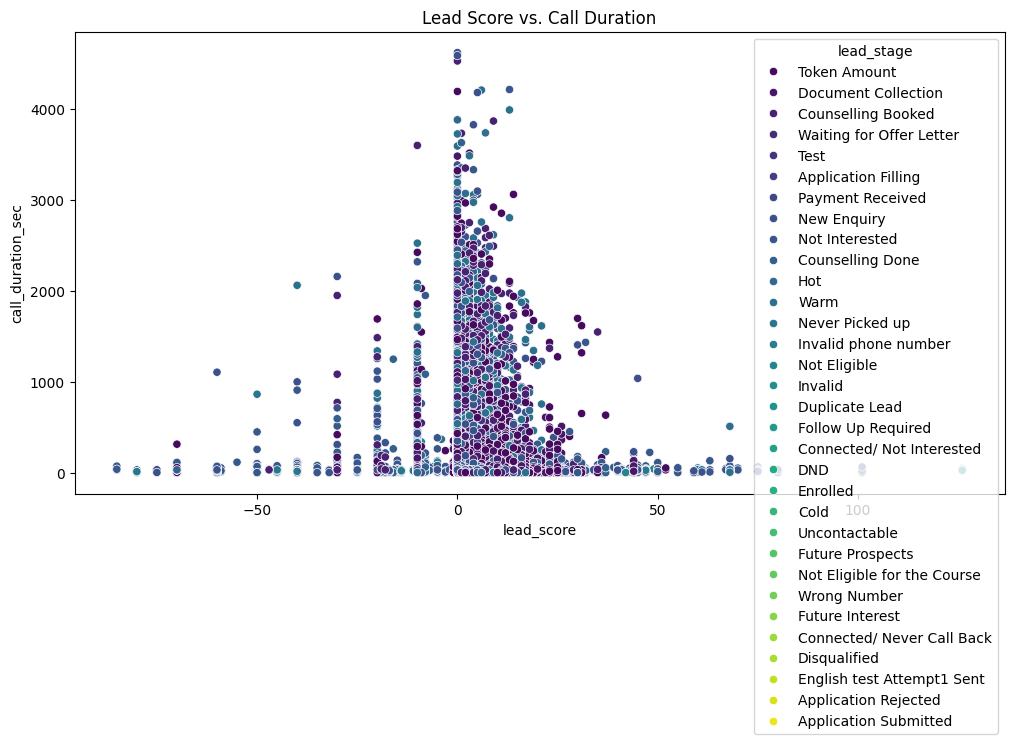

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Phone_Cleaned.csv")



plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='lead_score', y='call_duration_sec', hue='lead_stage', palette='viridis')
plt.title('Lead Score vs. Call Duration')
plt.show()





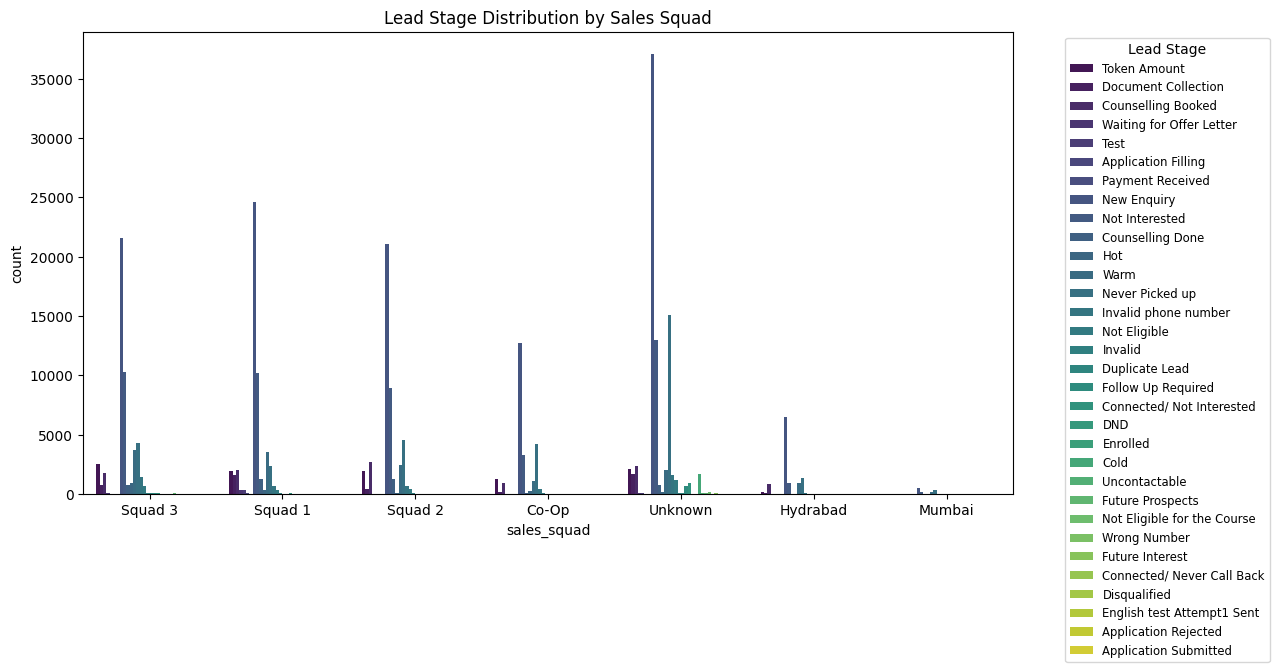

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='sales_squad', hue='lead_stage', palette='viridis')
plt.title('Lead Stage Distribution by Sales Squad')
plt.legend(title='Lead Stage', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()

C:\Users\sudhe\AppData\Local\Temp\ipykernel_11252\1395148463.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='inbound_phone_call_counter', y='outbound_phone_call_counter', size='lead_score', palette='viridis', sizes=(20, 200))


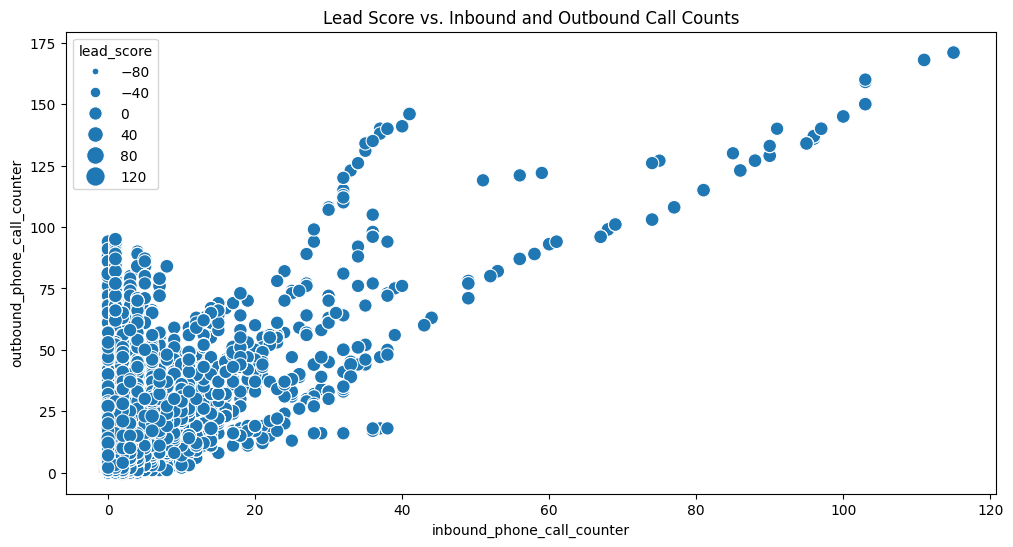

In [6]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='inbound_phone_call_counter', y='outbound_phone_call_counter', size='lead_score', palette='viridis', sizes=(20, 200))
plt.title('Lead Score vs. Inbound and Outbound Call Counts')
plt.show()



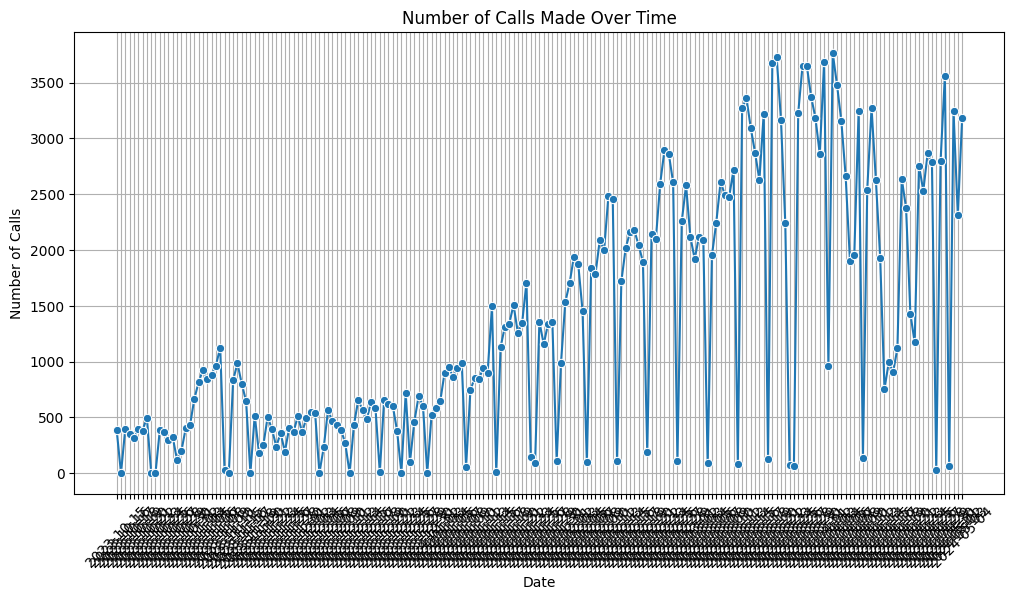

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


call_counts = df.groupby('call_date').size()

plt.figure(figsize=(12, 6))
sns.lineplot(data=call_counts, marker='o')
plt.title('Number of Calls Made Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


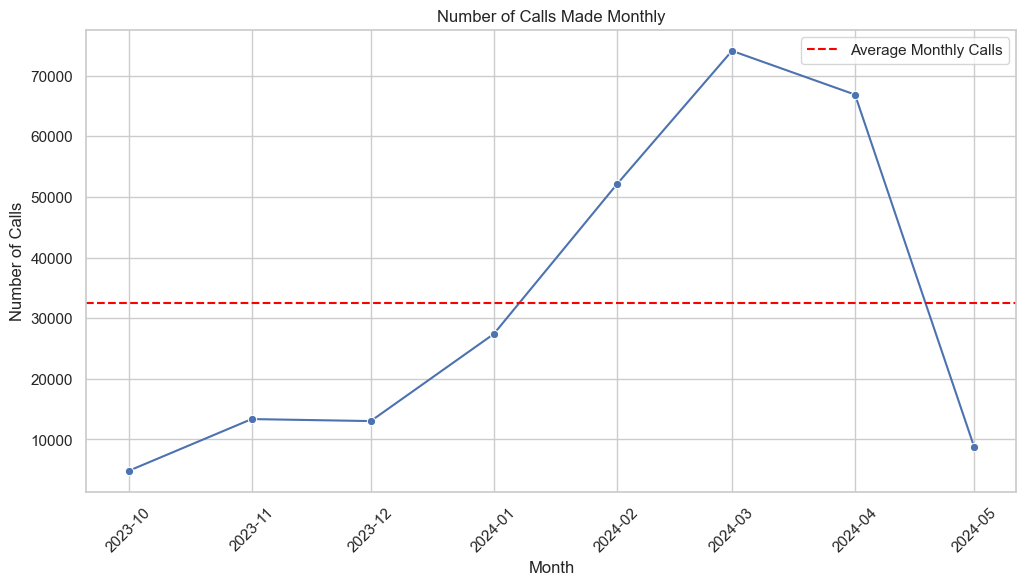

Average Monthly Call Count: 32562.50


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


call_counts = df['call_date'].value_counts().reset_index()
call_counts.columns = ['call_date', 'count']

call_counts['call_date'] = pd.to_datetime(call_counts['call_date'])

call_counts['month'] = call_counts['call_date'].dt.to_period('M')

monthly_counts = call_counts.groupby('month')['count'].sum().reset_index()

average_monthly_counts = monthly_counts['count'].mean()

monthly_counts['month'] = monthly_counts['month'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts, x='month', y='count', marker='o')
plt.axhline(y=average_monthly_counts, color='red', linestyle='--', label='Average Monthly Calls')
plt.title('Number of Calls Made Monthly')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

print(f'Average Monthly Call Count: {average_monthly_counts:.2f}')


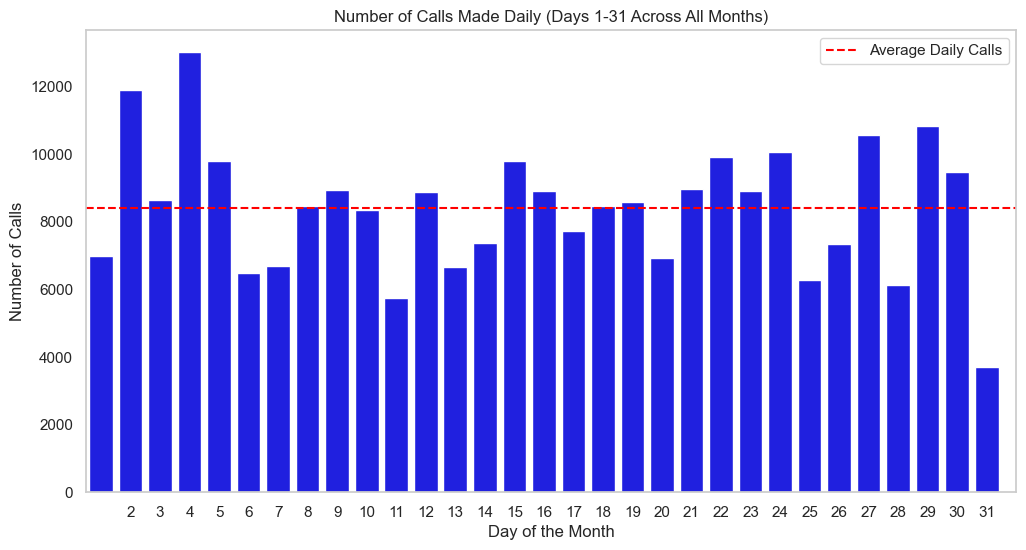

Average Daily Call Count: 8403.23


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['call_date'] = pd.to_datetime(df['call_date'])

df['day'] = df['call_date'].dt.day

daily_counts = df['day'].value_counts().reset_index()
daily_counts.columns = ['day', 'count']

daily_counts.sort_values('day', inplace=True)

all_days = pd.DataFrame({'day': range(1, 32)})

daily_counts = pd.merge(all_days, daily_counts, on='day', how='left').fillna(0)

average_daily_counts = daily_counts['count'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(data=daily_counts, x='day', y='count', color='blue')
plt.axhline(y=average_daily_counts, color='red', linestyle='--', label='Average Daily Calls')
plt.title('Number of Calls Made Daily (Days 1-31 Across All Months)')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Calls')
plt.xticks(range(1, 32))  
plt.grid(axis='y')
plt.legend()
plt.show()

print(f'Average Daily Call Count: {average_daily_counts:.2f}')


C:\Users\sudhe\AppData\Local\Temp\ipykernel_11252\2206646643.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=owner_performance, x='owner', y='total_calls', palette='viridis')


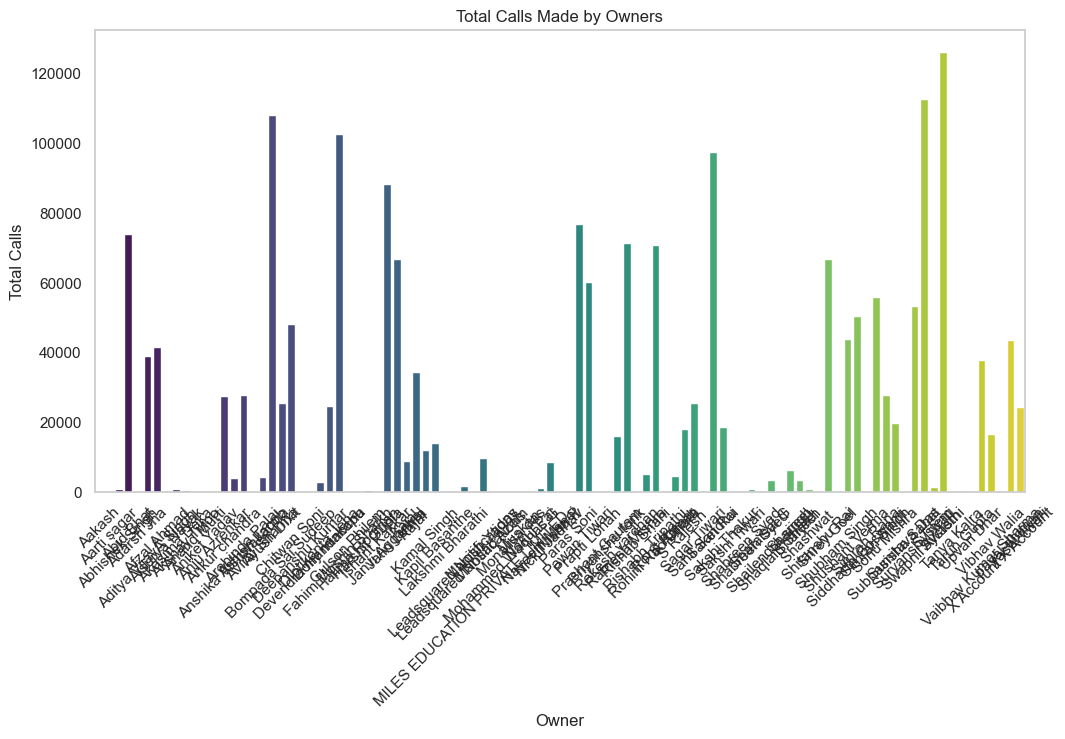

C:\Users\sudhe\AppData\Local\Temp\ipykernel_11252\2206646643.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=squad_performance, x='sales_squad', y='total_calls', palette='viridis')


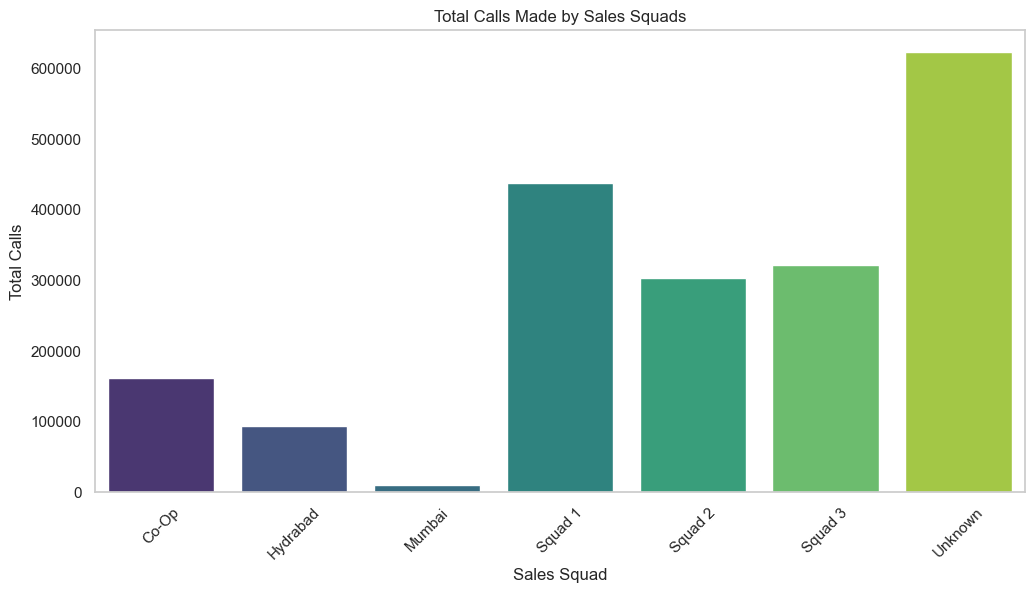

C:\Users\sudhe\AppData\Local\Temp\ipykernel_11252\2206646643.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=role_performance, x='squad_role', y='total_calls', palette='viridis')


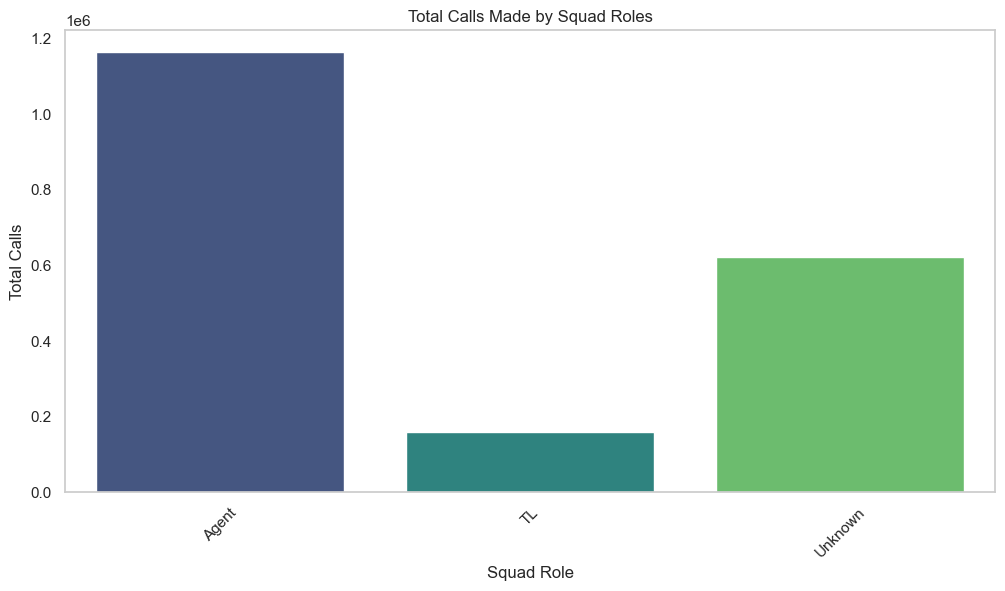

C:\Users\sudhe\AppData\Local\Temp\ipykernel_11252\2206646643.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=calls_done_by_performance, x='calls_done_by', y='total_calls', palette='viridis')


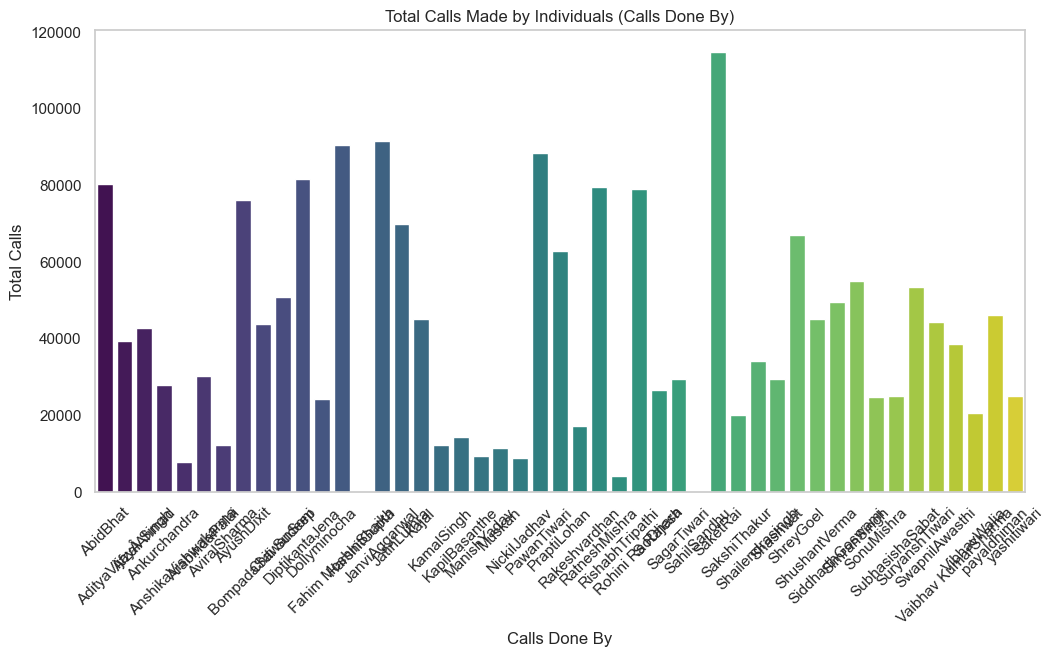

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['call_date'] = pd.to_datetime(df['call_date'])

df['total_calls'] = df['inbound_phone_call_counter'] + df['outbound_phone_call_counter']

owner_performance = df.groupby('owner').agg(
    total_calls=('total_calls', 'sum'),
    avg_call_duration=('call_duration_sec', 'mean'),
    total_lead_score=('lead_score', 'sum')
).reset_index()

squad_performance = df.groupby('sales_squad').agg(
    total_calls=('total_calls', 'sum'),
    avg_call_duration=('call_duration_sec', 'mean'),
    total_lead_score=('lead_score', 'sum')
).reset_index()

role_performance = df.groupby('squad_role').agg(
    total_calls=('total_calls', 'sum'),
    avg_call_duration=('call_duration_sec', 'mean'),
    total_lead_score=('lead_score', 'sum')
).reset_index()

calls_done_by_performance = df.groupby('calls_done_by').agg(
    total_calls=('total_calls', 'sum'),
    avg_call_duration=('call_duration_sec', 'mean'),
    total_lead_score=('lead_score', 'sum')
).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=owner_performance, x='owner', y='total_calls', palette='viridis')
plt.title('Total Calls Made by Owners')
plt.xlabel('Owner')
plt.ylabel('Total Calls')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=squad_performance, x='sales_squad', y='total_calls', palette='viridis')
plt.title('Total Calls Made by Sales Squads')
plt.xlabel('Sales Squad')
plt.ylabel('Total Calls')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=role_performance, x='squad_role', y='total_calls', palette='viridis')
plt.title('Total Calls Made by Squad Roles')
plt.xlabel('Squad Role')
plt.ylabel('Total Calls')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=calls_done_by_performance, x='calls_done_by', y='total_calls', palette='viridis')
plt.title('Total Calls Made by Individuals (Calls Done By)')
plt.xlabel('Calls Done By')
plt.ylabel('Total Calls')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


C:\Users\sudhe\AppData\Local\Temp\ipykernel_11252\330676013.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("merged.csv")
C:\Users\sudhe\AppData\Local\Temp\ipykernel_11252\330676013.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_owners, x='owner', y='total_calls', palette='viridis')


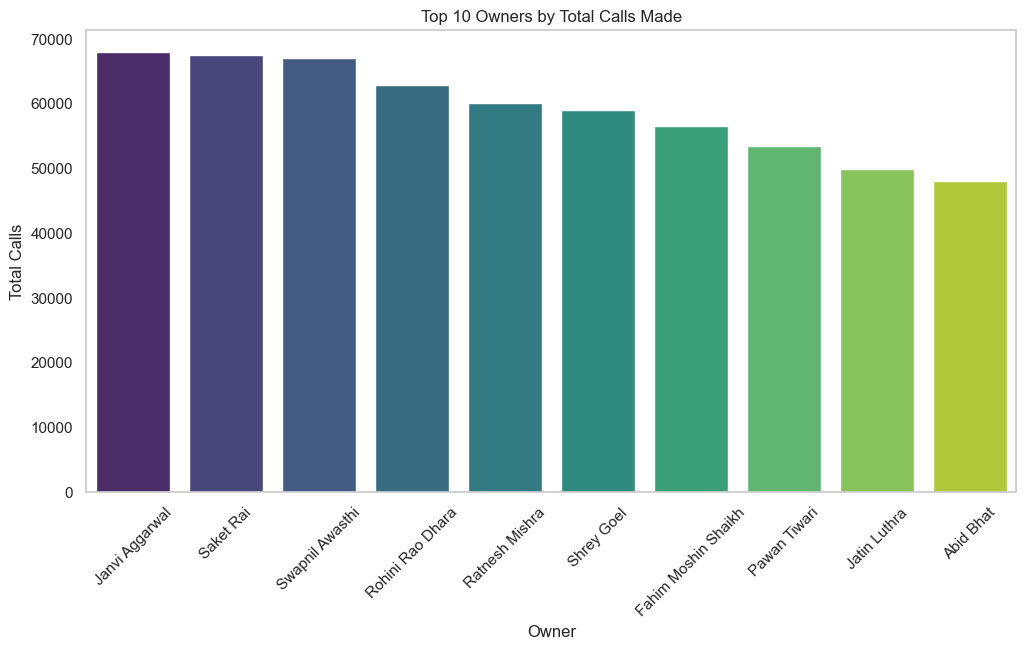

C:\Users\sudhe\AppData\Local\Temp\ipykernel_11252\330676013.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_calls_done_by, x='calls_done_by', y='total_calls', palette='viridis')


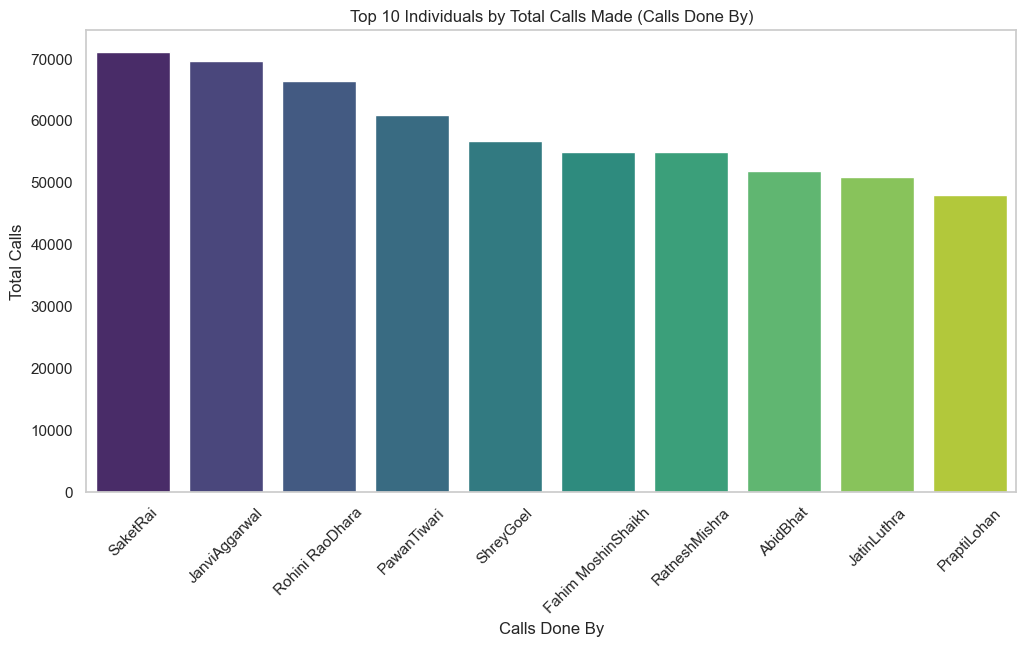

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("merged.csv")


df['call_date'] = pd.to_datetime(df['call_date'])

df['total_calls'] = df['inbound_phone_call_counter'] + df['outbound_phone_call_counter']

owner_performance = df.groupby('owner').agg(
    total_calls=('total_calls', 'sum'),
    avg_call_duration=('call_duration_sec', 'mean'),
    total_lead_score=('lead_score', 'sum')
).reset_index()

top_10_owners = owner_performance.nlargest(10, 'total_calls')

calls_done_by_performance = df.groupby('calls_done_by').agg(
    total_calls=('total_calls', 'sum'),
    avg_call_duration=('call_duration_sec', 'mean'),
    total_lead_score=('lead_score', 'sum')
).reset_index()

top_10_calls_done_by = calls_done_by_performance.nlargest(10, 'total_calls')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_owners, x='owner', y='total_calls', palette='viridis')
plt.title('Top 10 Owners by Total Calls Made')
plt.xlabel('Owner')
plt.ylabel('Total Calls')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_calls_done_by, x='calls_done_by', y='total_calls', palette='viridis')
plt.title('Top 10 Individuals by Total Calls Made (Calls Done By)')
plt.xlabel('Calls Done By')
plt.ylabel('Total Calls')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

filtered_df = df[df['owner'].isin(top_10_owners['owner'])]

graduation_segmentation = filtered_df.groupby(['owner', 'graduation_degree']).agg(
    total_calls=('total_calls', 'sum'),
    total_leads=('lead_number', 'count')
).reset_index()




<Figure size 1200x600 with 0 Axes>

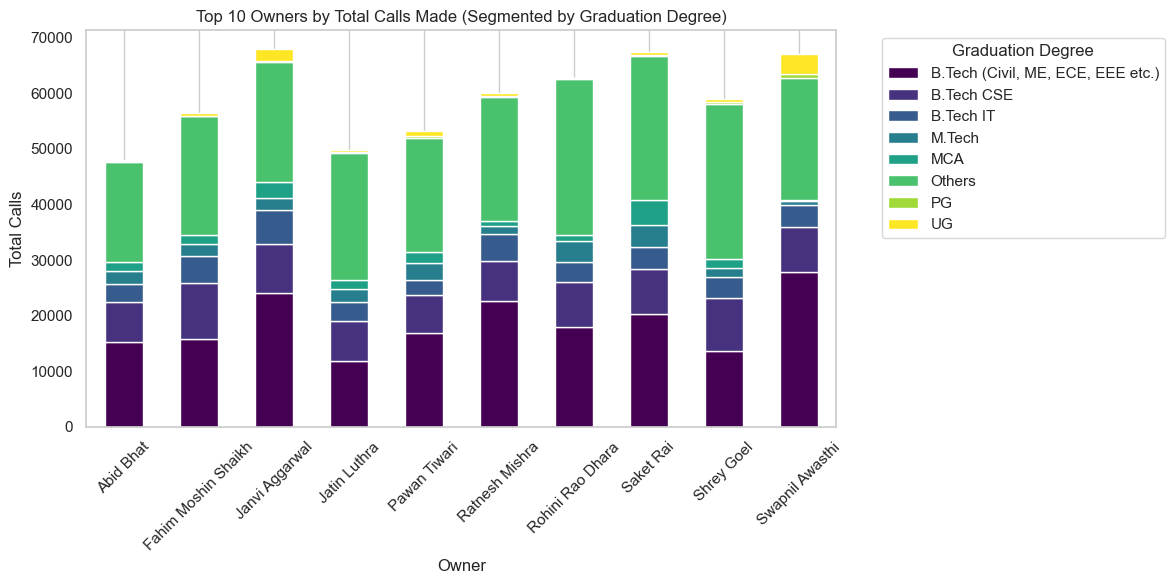

<Figure size 1200x600 with 0 Axes>

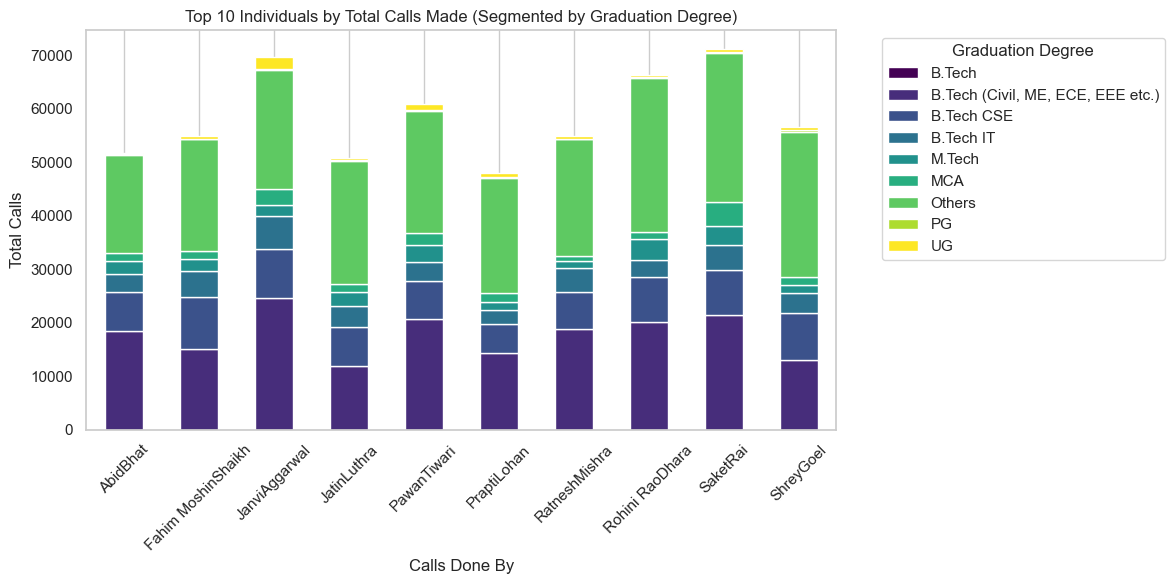

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df['call_date'] = pd.to_datetime(df['call_date'])

df['total_calls'] = df['inbound_phone_call_counter'] + df['outbound_phone_call_counter']

owner_performance = df.groupby('owner').agg(
    total_calls=('total_calls', 'sum'),
    avg_call_duration=('call_duration_sec', 'mean'),
    total_lead_score=('lead_score', 'sum')
).reset_index()

top_10_owners = owner_performance.nlargest(10, 'total_calls')

filtered_df = df[df['owner'].isin(top_10_owners['owner'])]

graduation_segmentation_owners = filtered_df.groupby(['owner', 'graduation_degree']).agg(
    total_calls=('total_calls', 'sum'),
    total_leads=('lead_number', 'count')
).reset_index()

pivot_table_owners = graduation_segmentation_owners.pivot(index='owner', columns='graduation_degree', values='total_calls').fillna(0)

plt.figure(figsize=(12, 6))
pivot_table_owners.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.title('Top 10 Owners by Total Calls Made (Segmented by Graduation Degree)')
plt.xlabel('Owner')
plt.ylabel('Total Calls')
plt.xticks(rotation=45)
plt.legend(title='Graduation Degree', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()  
plt.show()

calls_done_by_performance = df.groupby('calls_done_by').agg(
    total_calls=('total_calls', 'sum'),
    avg_call_duration=('call_duration_sec', 'mean'),
    total_lead_score=('lead_score', 'sum')
).reset_index()

top_10_calls_done_by = calls_done_by_performance.nlargest(10, 'total_calls')

filtered_df_calls_done_by = df[df['calls_done_by'].isin(top_10_calls_done_by['calls_done_by'])]

graduation_segmentation_calls_done_by = filtered_df_calls_done_by.groupby(['calls_done_by', 'graduation_degree']).agg(
    total_calls=('total_calls', 'sum'),
    total_leads=('lead_number', 'count')
).reset_index()

pivot_table_calls_done_by = graduation_segmentation_calls_done_by.pivot(index='calls_done_by', columns='graduation_degree', values='total_calls').fillna(0)

plt.figure(figsize=(12, 6))
pivot_table_calls_done_by.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.title('Top 10 Individuals by Total Calls Made (Segmented by Graduation Degree)')
plt.xlabel('Calls Done By')
plt.ylabel('Total Calls')
plt.xticks(rotation=45)
plt.legend(title='Graduation Degree', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout() 
plt.show()


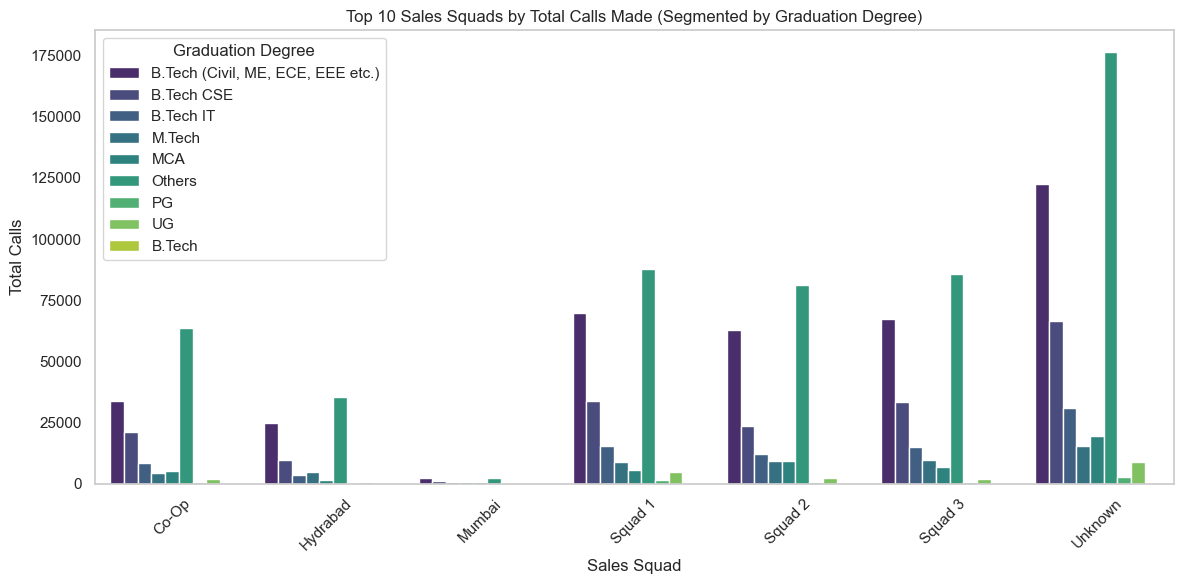

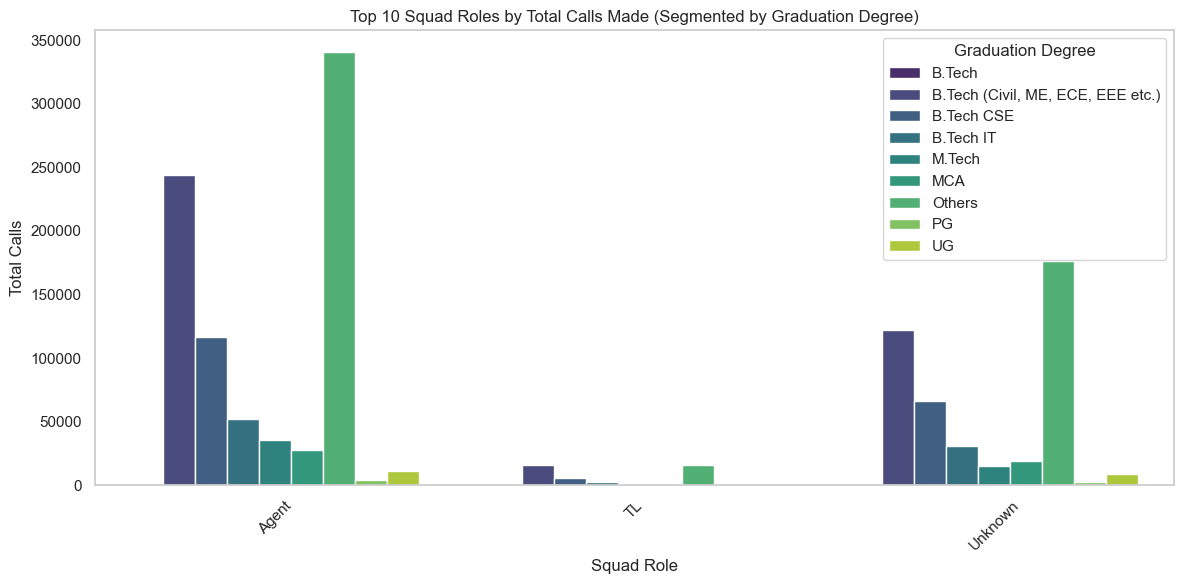

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['call_date'] = pd.to_datetime(df['call_date'])

df['total_calls'] = df['inbound_phone_call_counter'] + df['outbound_phone_call_counter']

sales_squad_performance = df.groupby('sales_squad').agg(
    total_calls=('total_calls', 'sum'),
    avg_call_duration=('call_duration_sec', 'mean'),
    total_lead_score=('lead_score', 'sum')
).reset_index()

top_10_sales_squads = sales_squad_performance.nlargest(10, 'total_calls')

filtered_df_sales_squad = df[df['sales_squad'].isin(top_10_sales_squads['sales_squad'])]

graduation_segmentation_sales_squad = filtered_df_sales_squad.groupby(['sales_squad', 'graduation_degree']).agg(
    total_calls=('total_calls', 'sum'),
    total_leads=('lead_number', 'count')
).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=graduation_segmentation_sales_squad, x='sales_squad', y='total_calls', hue='graduation_degree', palette='viridis')
plt.title('Top 10 Sales Squads by Total Calls Made (Segmented by Graduation Degree)')
plt.xlabel('Sales Squad')
plt.ylabel('Total Calls')
plt.xticks(rotation=45)
plt.legend(title='Graduation Degree')
plt.grid(axis='y')
plt.tight_layout()  
plt.show()

squad_role_performance = df.groupby('squad_role').agg(
    total_calls=('total_calls', 'sum'),
    avg_call_duration=('call_duration_sec', 'mean'),
    total_lead_score=('lead_score', 'sum')
).reset_index()

top_10_squad_roles = squad_role_performance.nlargest(10, 'total_calls')

filtered_df_squad_role = df[df['squad_role'].isin(top_10_squad_roles['squad_role'])]

graduation_segmentation_squad_role = filtered_df_squad_role.groupby(['squad_role', 'graduation_degree']).agg(
    total_calls=('total_calls', 'sum'),
    total_leads=('lead_number', 'count')
).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=graduation_segmentation_squad_role, x='squad_role', y='total_calls', hue='graduation_degree', palette='viridis')
plt.title('Top 10 Squad Roles by Total Calls Made (Segmented by Graduation Degree)')
plt.xlabel('Squad Role')
plt.ylabel('Total Calls')
plt.xticks(rotation=45)
plt.legend(title='Graduation Degree')
plt.grid(axis='y')
plt.tight_layout()  
plt.show()